# Text Representation

This notebook covers different methods for representing text as numerical vectors that machine learning models can understand:
- **Bag of Words (BOW)**: Simple word frequency representation
- **Count Vectorizer**: Scikit-learn implementation of BOW
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: Weighted word importance
- **Word2Vec**: Word embeddings using neural networks
- **Modern Embeddings**: Overview of transformer-based embeddings

## Learning Objectives

- Understand different text representation techniques
- Convert text to numerical vectors using various methods
- Compare and contrast different representation approaches
- Apply embeddings for semantic similarity and clustering


## Installation

Run this cell to install required packages (uncomment if needed):


In [ ]:
# Install packages (uncomment if needed)
# !pip install scikit-learn gensim numpy pandas matplotlib seaborn


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## Sample Documents

We'll use these sample documents to demonstrate different text representation methods:


In [2]:
# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence",
    "Artificial intelligence and machine learning are transforming technology",
    "Deep learning is a type of machine learning",
    "Natural language processing uses machine learning",
    "Computer vision and image processing are important AI fields"
]

print("Sample Documents:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")


Sample Documents:
1. Machine learning is a subset of artificial intelligence
2. Artificial intelligence and machine learning are transforming technology
3. Deep learning is a type of machine learning
4. Natural language processing uses machine learning
5. Computer vision and image processing are important AI fields


# 1. Bag of Words (BOW)

Bag of Words is the simplest text representation method. It creates a vocabulary of all unique words and represents each document as a vector of word counts.

## 1.1 Manual BOW Implementation


In [7]:
# Manual BOW implementation
def create_bow(documents):
    """Create a simple Bag of Words representation"""
    # Build vocabulary
    vocabulary = set()
    for doc in documents:
        words = doc.lower().split()
        vocabulary.update(words)
    
    vocabulary = sorted(list(vocabulary))
    
    # Create BOW vectors
    bow_vectors = []
    for doc in documents:
        words = doc.lower().split()
        vector = [words.count(word) for word in vocabulary]
        bow_vectors.append(vector)
    
    return vocabulary, np.array(bow_vectors)

vocab, bow_matrix = create_bow(documents)

print("Vocabulary:", vocab)
print("\nBOW Matrix:")
pd.DataFrame(bow_matrix, columns=vocab, index=[f"Doc {i+1}" for i in range(len(documents))])


Vocabulary: ['a', 'ai', 'and', 'are', 'artificial', 'computer', 'deep', 'fields', 'image', 'important', 'intelligence', 'is', 'language', 'learning', 'machine', 'natural', 'of', 'processing', 'subset', 'technology', 'transforming', 'type', 'uses', 'vision']

BOW Matrix:


,a,ai,and,are,artificial,computer,deep,fields,image,important,...,machine,natural,of,processing,subset,technology,transforming,type,uses,vision
Doc 1,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
Doc 2,0,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
Doc 3,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
Doc 4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
Doc 5,0,1,1,1,0,1,0,1,1,1,...,0,0,0,1,0,0,0,0,0,1


## 1.2 Count Vectorizer (Scikit-learn)

Scikit-learn's `CountVectorizer` provides a more robust BOW implementation with preprocessing options:


In [5]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform documents
count_matrix = count_vectorizer.fit_transform(documents)

# Get vocabulary
vocabulary = count_vectorizer.get_feature_names_out()

# Convert to dense array for visualization
count_array = count_matrix.toarray()

print("Count Vectorizer Results:")
print(f"Vocabulary size: {len(vocabulary)}")
print("\nCount Matrix:")
df = pd.DataFrame(count_array, columns=vocabulary, index=[f"Doc {i+1}" for i in range(len(documents))])
df


Count Vectorizer Results:
Vocabulary size: 23

Count Matrix:


,ai,and,are,artificial,computer,deep,fields,image,important,intelligence,...,machine,natural,of,processing,subset,technology,transforming,type,uses,vision
Doc 1,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
Doc 2,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
Doc 3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
Doc 4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
Doc 5,1,1,1,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [8]:
# CountVectorizer with options
count_vect = CountVectorizer(
    lowercase=True,      # Convert to lowercase
    stop_words='english', # Remove stop words
    max_features=50,      # Limit vocabulary size
    ngram_range=(1, 2)   # Use unigrams and bigrams
)

count_matrix_advanced = count_vect.fit_transform(documents)
vocab_advanced = count_vect.get_feature_names_out()

print("Advanced Count Vectorizer (with stop words removal and bigrams):")
print(f"Vocabulary size: {len(vocab_advanced)}")
print(f"Sample vocabulary: {list(vocab_advanced[:10])}")


Advanced Count Vectorizer (with stop words removal and bigrams):
Vocabulary size: 39
Sample vocabulary: ['ai', 'ai fields', 'artificial', 'artificial intelligence', 'computer', 'computer vision', 'deep', 'deep learning', 'fields', 'image']


# 2. TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF weights words by their importance: frequent in a document but rare across all documents get higher weights.

**TF (Term Frequency)**: How often a term appears in a document
**IDF (Inverse Document Frequency)**: How rare a term is across all documents

$$TF\text{-}IDF(t, d) = TF(t, d) \times IDF(t)$$

$$IDF(t) = \log\frac{N}{df(t)}$$

where N is the total number of documents and df(t) is the number of documents containing term t.


In [10]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get vocabulary
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

# Convert to dense array for visualization
tfidf_array = tfidf_matrix.toarray()

print("TF-IDF Results:")
print(f"Vocabulary size: {len(tfidf_vocab)}")
print("\nTF-IDF Matrix:")
df_tfidf = pd.DataFrame(tfidf_array, columns=tfidf_vocab, index=[f"Doc {i+1}" for i in range(len(documents))])
df_tfidf.round(3)


TF-IDF Results:
Vocabulary size: 23

TF-IDF Matrix:


,ai,and,are,artificial,computer,deep,fields,image,important,intelligence,...,machine,natural,of,processing,subset,technology,transforming,type,uses,vision
Doc 1,0.000,0.000,0.000,0.392,0.000,0.000,0.000,0.000,0.000,0.392,...,0.274,0.000,0.392,0.000,0.486,0.000,0.000,0.000,0.000,0.000
Doc 2,0.000,0.353,0.353,0.353,0.000,0.000,0.000,0.000,0.000,0.353,...,0.246,0.000,0.000,0.000,0.000,0.437,0.437,0.000,0.000,0.000
Doc 3,0.000,0.000,0.000,0.000,0.000,0.452,0.000,0.000,0.000,0.000,...,0.255,0.000,0.365,0.000,0.000,0.000,0.000,0.452,0.000,0.000
Doc 4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.272,0.483,0.000,0.390,0.000,0.000,0.000,0.000,0.483,0.000
Doc 5,0.355,0.286,0.286,0.000,0.355,0.000,0.355,0.355,0.355,0.000,...,0.000,0.000,0.000,0.286,0.000,0.000,0.000,0.000,0.000,0.355


In [11]:
# Show top terms for each document
print("Top TF-IDF Terms per Document:")
for i, doc in enumerate(documents):
    # Get TF-IDF scores for this document
    scores = tfidf_array[i]
    # Get indices of top 5 terms
    top_indices = scores.argsort()[-5:][::-1]
    top_terms = [(tfidf_vocab[idx], scores[idx]) for idx in top_indices]
    
    print(f"\nDoc {i+1}: {doc[:50]}...")
    for term, score in top_terms:
        print(f"  {term}: {score:.3f}")


Top TF-IDF Terms per Document:

Doc 1: Machine learning is a subset of artificial intelli...
  subset: 0.486
  artificial: 0.392
  of: 0.392
  is: 0.392
  intelligence: 0.392

Doc 2: Artificial intelligence and machine learning are t...
  transforming: 0.437
  technology: 0.437
  and: 0.353
  are: 0.353
  artificial: 0.353

Doc 3: Deep learning is a type of machine learning...
  learning: 0.510
  type: 0.452
  deep: 0.452
  of: 0.365
  is: 0.365

Doc 4: Natural language processing uses machine learning...
  language: 0.483
  natural: 0.483
  uses: 0.483
  processing: 0.390
  machine: 0.272

Doc 5: Computer vision and image processing are important...
  vision: 0.355
  important: 0.355
  computer: 0.355
  fields: 0.355
  image: 0.355


Document Similarity Matrix (Cosine Similarity):
       Doc 1  Doc 2  Doc 3  Doc 4  Doc 5
Doc 1  1.000  0.411  0.495  0.149  0.000
Doc 2  0.411  1.000  0.188  0.134  0.202
Doc 3  0.495  0.188  1.000  0.208  0.000
Doc 4  0.149  0.134  0.208  1.000  0.111
Doc 5  0.000  0.202  0.000  0.111  1.000


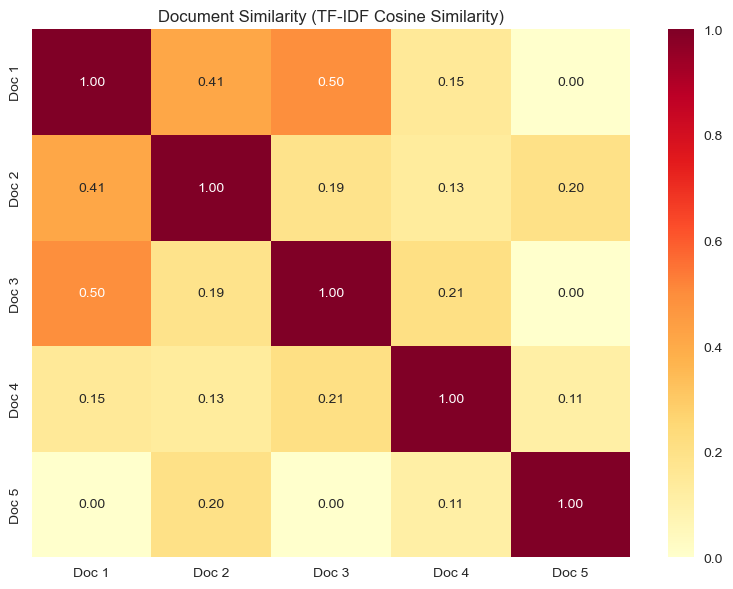

In [12]:
# Calculate document similarity using TF-IDF
similarity_matrix = cosine_similarity(tfidf_matrix)

print("Document Similarity Matrix (Cosine Similarity):")
df_sim = pd.DataFrame(similarity_matrix, 
                     index=[f"Doc {i+1}" for i in range(len(documents))],
                     columns=[f"Doc {i+1}" for i in range(len(documents))])
print(df_sim.round(3))

# Visualize similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
            xticklabels=[f"Doc {i+1}" for i in range(len(documents))],
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title('Document Similarity (TF-IDF Cosine Similarity)')
plt.tight_layout()
plt.show()


# 3. Word2Vec

Word2Vec creates dense vector representations (embeddings) where similar words have similar vectors. It captures semantic relationships.

Two architectures:
- **CBOW (Continuous Bag of Words)**: Predicts word from context
- **Skip-gram**: Predicts context from word


In [13]:
# Prepare text data for Word2Vec (tokenized sentences)
tokenized_docs = [doc.lower().split() for doc in documents]

print("Tokenized Documents:")
for i, tokens in enumerate(tokenized_docs, 1):
    print(f"Doc {i}: {tokens}")


Tokenized Documents:
Doc 1: ['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence']
Doc 2: ['artificial', 'intelligence', 'and', 'machine', 'learning', 'are', 'transforming', 'technology']
Doc 3: ['deep', 'learning', 'is', 'a', 'type', 'of', 'machine', 'learning']
Doc 4: ['natural', 'language', 'processing', 'uses', 'machine', 'learning']
Doc 5: ['computer', 'vision', 'and', 'image', 'processing', 'are', 'important', 'ai', 'fields']


In [14]:
# Train Word2Vec model
# Parameters:
# - size: dimension of word vectors (embeddings)
# - window: maximum distance between current and predicted word
# - min_count: ignore words with frequency < min_count
# - sg: 0 for CBOW, 1 for Skip-gram

word2vec_model = Word2Vec(
    sentences=tokenized_docs,
    vector_size=100,      # Dimension of word vectors
    window=5,             # Context window size
    min_count=1,          # Minimum word frequency
    workers=4,            # Number of threads
    sg=0                  # 0 = CBOW, 1 = Skip-gram
)

print("Word2Vec model trained!")
print(f"Vocabulary size: {len(word2vec_model.wv.key_to_index)}")
print(f"Vector dimension: {word2vec_model.wv.vector_size}")


Word2Vec model trained!
Vocabulary size: 24
Vector dimension: 100


In [15]:
# Get word vectors
words_to_check = ['machine', 'learning', 'artificial', 'intelligence']

print("Word Vectors (first 10 dimensions):")
for word in words_to_check:
    if word in word2vec_model.wv:
        vector = word2vec_model.wv[word]
        print(f"\n{word}: {vector[:10]}... (shape: {vector.shape})")
    else:
        print(f"\n{word}: Not in vocabulary")


Word Vectors (first 10 dimensions):

machine: [-0.00861996  0.00366631  0.00519119  0.00574304  0.00746572 -0.00616916
  0.00110443  0.00604858 -0.00284006 -0.00617491]... (shape: (100,))

learning: [-0.00054043  0.00024344  0.00510043  0.00900235 -0.00929956 -0.00711869
  0.00645933  0.00898239 -0.00501838 -0.00376861]... (shape: (100,))

artificial: [ 8.1283236e-03 -4.4565508e-03 -1.0725439e-03  1.0067581e-03
 -1.9012803e-04  1.1457859e-03  6.1135096e-03 -1.5872516e-05
 -3.2471674e-03 -1.5138543e-03]... (shape: (100,))

intelligence: [-0.00872993  0.00213293 -0.00087372 -0.0093221  -0.00942963 -0.00141139
  0.00443363  0.00370727 -0.00650091 -0.00687585]... (shape: (100,))


In [16]:
# Find most similar words
test_words = ['machine', 'learning', 'artificial']

print("Most Similar Words:")
for word in test_words:
    if word in word2vec_model.wv:
        similar = word2vec_model.wv.most_similar(word, topn=5)
        print(f"\nWords similar to '{word}':")
        for similar_word, score in similar:
            print(f"  {similar_word}: {score:.3f}")


Most Similar Words:

Words similar to 'machine':
  transforming: 0.189
  vision: 0.161
  natural: 0.159
  image: 0.137
  subset: 0.128

Words similar to 'learning':
  uses: 0.219
  is: 0.216
  important: 0.093
  of: 0.093
  deep: 0.084

Words similar to 'artificial':
  uses: 0.164
  processing: 0.146
  type: 0.111
  technology: 0.094
  natural: 0.075


In [19]:
# Word analogies (e.g., king - man + woman ≈ queen)
# This demonstrates semantic relationships captured by Word2Vec

print("Word Analogies:")
print("Note: With limited training data, results may not be perfect")

# Example: learning - machine + intelligence ≈ ?
if all(word in word2vec_model.wv for word in ['learning', 'machine', 'artificial']):
    result = word2vec_model.wv.most_similar(
        positive=['learning', 'intelligence'],
        negative=['machine'],
        topn=3
    )
    print(f"\n'learning' - 'machine' + 'intelligence' ≈ ?")
    for word, score in result:
        print(f"  {word}: {score:.3f}")


Word Analogies:
Note: With limited training data, results may not be perfect

'learning' - 'machine' + 'intelligence' ≈ ?
  uses: 0.144
  ai: 0.140
  fields: 0.128


In [20]:
# Get document embeddings by averaging word vectors
def get_document_embedding(doc_tokens, model):
    """Get document embedding by averaging word vectors"""
    words = [word for word in doc_tokens if word in model.wv]
    if len(words) == 0:
        return None
    vectors = [model.wv[word] for word in words]
    return np.mean(vectors, axis=0)

# Get embeddings for all documents
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_document_embedding(tokens, word2vec_model)
    if embedding is not None:
        doc_embeddings.append(embedding)
        print(f"Doc {i+1} embedding shape: {embedding.shape}")
    else:
        print(f"Doc {i+1}: No valid words found")

doc_embeddings = np.array(doc_embeddings)
print(f"\nDocument embeddings matrix shape: {doc_embeddings.shape}")


Doc 1 embedding shape: (100,)
Doc 2 embedding shape: (100,)
Doc 3 embedding shape: (100,)
Doc 4 embedding shape: (100,)
Doc 5 embedding shape: (100,)

Document embeddings matrix shape: (5, 100)


# 4. Modern Embeddings Overview

Modern NLP uses transformer-based models that generate contextual embeddings. Here's an overview:


## 4.1 Types of Modern Embeddings

### Contextual vs Non-Contextual

- **Non-Contextual (Word2Vec, GloVe)**: Same word always has the same embedding
  - Example: "bank" (river bank) and "bank" (financial bank) have the same vector
  
- **Contextual (BERT, GPT, etc.)**: Same word has different embeddings based on context
  - Example: "bank" in "river bank" vs "bank account" have different embeddings

### Popular Embedding Models

1. **Word2Vec** (2013): Word-level embeddings, non-contextual
2. **GloVe** (2014): Global word co-occurrence statistics
3. **ELMo** (2018): Contextual embeddings using bidirectional LSTMs
4. **BERT** (2018): Bidirectional transformer, contextual embeddings
5. **GPT** (2018+): Generative transformer models
6. **Sentence Transformers** (2019+): Optimized for sentence-level embeddings


In [21]:
# Example: Using sentence-transformers (install with: pip install sentence-transformers)
# This is commented out but shows how to use modern embeddings

"""
from sentence_transformers import SentenceTransformer

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(documents)

print(f"Embedding shape: {embeddings.shape}")
print(f"Each document is represented as a {embeddings.shape[1]}-dimensional vector")

# Calculate similarity
similarity = cosine_similarity(embeddings)
print("\nDocument Similarity (using Sentence Transformers):")
print(pd.DataFrame(similarity, 
                   index=[f"Doc {i+1}" for i in range(len(documents))],
                   columns=[f"Doc {i+1}" for i in range(len(documents))]).round(3))
"""
print("Note: Install sentence-transformers to use modern embeddings")
print("pip install sentence-transformers")


Note: Install sentence-transformers to use modern embeddings
pip install sentence-transformers


# 5. Comparison and When to Use What

## Comparison Table

| Method | Dimensions | Contextual | Speed | Use Case |
|--------|-----------|------------|-------|----------|
| **BOW/Count** | Vocabulary size | ❌ No | ⚡ Very Fast | Simple classification, baseline |
| **TF-IDF** | Vocabulary size | ❌ No | ⚡ Fast | Information retrieval, search |
| **Word2Vec** | 100-300 | ❌ No | ⚡ Fast | Word similarity, analogies |
| **BERT/Transformers** | 768-1024+ | ✅ Yes | 🐌 Slow | Semantic understanding, modern NLP |

## Recommendations

- **BOW/TF-IDF**: 
  - Good for: Simple classification, baseline models, small datasets
  - Bad for: Semantic understanding, capturing word relationships
  
- **Word2Vec**: 
  - Good for: Word similarity, analogies, when you need word-level embeddings
  - Bad for: Context-dependent meanings, capturing sentence semantics
  
- **Modern Embeddings (BERT, etc.)**: 
  - Good for: Semantic search, understanding context, state-of-the-art results
  - Bad for: Real-time applications (unless optimized), very large datasets without GPU


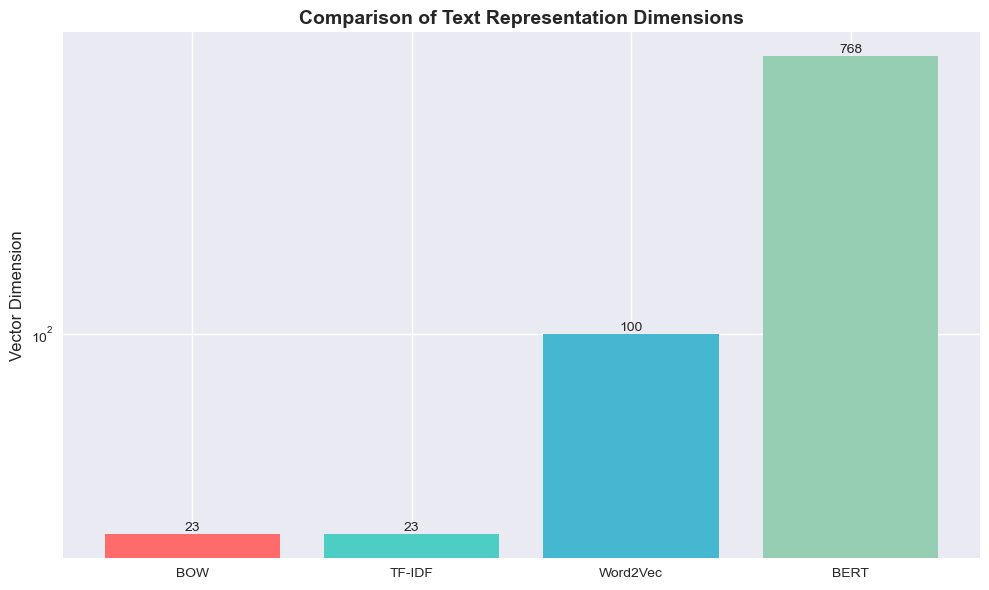

Note: BOW/TF-IDF dimensions = vocabulary size (23 words)
Word2Vec typically uses 100-300 dimensions
BERT uses 768-1024 dimensions


In [22]:
# Visualize the difference in dimensionality
methods = ['BOW', 'TF-IDF', 'Word2Vec', 'BERT']
vocab_size = len(vocabulary)
dimensions = [vocab_size, vocab_size, 100, 768]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(methods, dimensions, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax.set_ylabel('Vector Dimension', fontsize=12)
ax.set_title('Comparison of Text Representation Dimensions', fontsize=14, fontweight='bold')
ax.set_yscale('log')  # Log scale to better show differences

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Note: BOW/TF-IDF dimensions = vocabulary size ({vocab_size} words)")
print("Word2Vec typically uses 100-300 dimensions")
print("BERT uses 768-1024 dimensions")


## Summary

This notebook covered:
- ✅ **Bag of Words (BOW)**: Simple word frequency representation
- ✅ **Count Vectorizer**: Scikit-learn implementation with preprocessing options
- ✅ **TF-IDF**: Weighted word importance for better document representation
- ✅ **Word2Vec**: Neural network-based word embeddings
- ✅ **Modern Embeddings**: Overview of transformer-based contextual embeddings

### Key Takeaways

1. **BOW/TF-IDF** are sparse, high-dimensional representations suitable for traditional ML
2. **Word2Vec** creates dense, low-dimensional embeddings capturing word relationships
3. **Modern embeddings** (BERT, etc.) provide contextual understanding but are computationally expensive
4. Choose the right representation based on your task, data size, and computational resources
